In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 2].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [3]:
# sunset, sunrise 단위를 분으로 고치기
station["sunrise"] = ((station["sunrise"].astype("int64")// 100 * 60) + (station['sunrise'].astype("int64") % 100))
station["sunset"] = ((station['sunset'].astype("int64") // 100 * 60) + (station['sunset'].astype("int64") % 100))

# daytime 계산
station["daytime"] = station["sunset"] - station["sunrise"]

In [4]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,436,986,RA,0.00,0.07,28.82,29.91,9.1,23.0,11.3,2012,1,1,87.218091,33.736026,550,6,1,2,1,0,0
1,2,2012-01-02,46.0,28.0,37.0,12.0,24.0,32.0,28.0,0.0,436,987,MD,0.05,0.01,28.51,29.62,12.7,26.0,13.3,2012,1,2,59.009292,28.579201,551,0,0,0,0,0,1
2,2,2012-01-03,28.0,9.0,18.5,-6.0,4.0,16.0,46.0,0.0,436,988,MD,0.00,0.00,28.69,29.85,12.3,31.0,12.8,2012,1,3,52.518736,5.373595,552,1,0,0,0,0,1
3,2,2012-01-04,21.0,5.0,13.0,-11.0,0.0,11.0,52.0,0.0,436,989,MD,0.00,0.00,28.87,30.01,10.1,27.0,11.7,2012,1,4,55.391792,-0.932125,553,2,0,0,0,0,1
4,2,2012-01-05,31.0,20.0,25.5,2.0,12.0,21.0,39.0,0.0,436,990,MD,0.00,0.00,28.70,29.84,10.9,26.0,11.3,2012,1,5,56.071391,14.961608,554,3,0,0,0,0,1


In [5]:
len(station)

1035

In [6]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 31 ( 3.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 0 ( 0.0 % )
sunset : 0 ( 0.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 5 ( 0.48 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 0 ( 0.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [7]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [8]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [9]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
95122,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,107,0
95123,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,108,0
95124,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,109,0
95125,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,110,0
95126,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,111,0


In [10]:
station['log1p_units'] = np.log1p(station.units)

In [11]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [12]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
95122,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,107
95123,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,108
95124,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,109
95125,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,110
95126,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,111


In [13]:
len(station)

95127

In [14]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [15]:
df2.to_csv("station2.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [16]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + sunset + sunrise + daytime + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5801.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:47:20   Log-Likelihood:            -2.7907e+05
No. Observations:               94572   AIC:                         5.585e+05
Df Residuals:                   94396   BIC:                         5.601e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]     -4.4768      5

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [17]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5801.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:47:51   Log-Likelihood:            -2.7907e+05
No. Observations:               94572   AIC:                         5.585e+05
Df Residuals:                   94396   BIC:                         5.601e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [18]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1159

In [19]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
93963,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,107,0
93964,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,108,0
93965,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,109,0
93966,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,110,0
93967,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,111,0


In [20]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) +scale(sunset) + scale(sunrise) + scale(daytime)\
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     8881.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:48:30   Log-Likelihood:            -1.7977e+05
No. Observations:               93420   AIC:                         3.599e+05
Df Residuals:                   93244   BIC:                         3.615e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승했으나, conditional number도 상승했다.

### 3-1. OLS :  df1 (units) - 아웃라이어 제거 + tmax/tmin/tavg 제거 + dewpoint/wetbulb제거 + stnpressure/sealevel제거 + resultdir제거 + sunset/sunrise/daytime 제거

In [21]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(resultspeed)  \
                            + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:48:44   Log-Likelihood:            -1.8060e+05
No. Observations:               93968   AIC:                         3.615e+05
Df Residuals:                   93835   BIC:                         3.627e+05
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(year)[2012]           

### 4. 변수변환 : df2 (log1p_units) 

In [22]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.009e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:49:16   Log-Likelihood:                 57334.
No. Observations:               94572   AIC:                        -1.143e+05
Df Residuals:                   94396   BIC:                        -1.127e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [23]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2787

In [24]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
92335,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,107,0.0
92336,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,108,0.0
92337,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,109,0.0
92338,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,110,0.0
92339,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,379,1003,MD,0.0,0.0,28.9,30.0,6.2,5.0,7.0,2014,10,31,69.102995,40.561053,624,4,0,0,0,0,1,16,111,0.0


In [25]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.997e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:49:51   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91626   BIC:                        -2.818e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다, conditional number는 약간 낮아짐

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [120]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + scale(sunset) + scale(sunrise) + scale(daytime) \
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.951e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:44:08   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91624   BIC:                        -2.818e+05
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

R^2값이 1에 가까워지고 조건수는 변화없어 과최적화가 의심

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/sunset/sunrise/daytime/stnpressure/sealevel제거(VIF에 근거)

In [146]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.092e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:09:58   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91630   BIC:                        -2.819e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [157]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.141e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:13:57   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91632   BIC:                        -2.819e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [169]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.191e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        01:21:36   Log-Likelihood:             1.4191e+05
No. Observations:               91800   AIC:                        -2.835e+05
Df Residuals:                   91634   BIC:                        -2.819e+05
Df Model:                         165                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

wetbulb, dewpoint추가로 지웠더니 conditional number 232까지 감소

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거)  + 유의하지 않은 변수 제거 -> 정규화

In [51]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~  C(month) + C(weekend) \
                            + C(rainY) + C(item_nbr) + 0', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.445e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:04:50   Log-Likelihood:                 57673.
No. Observations:               95127   AIC:                        -1.151e+05
Df Residuals:                   95003   BIC:                        -1.139e+05
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(month)[1]           -0.0027      0

### F- 검정

In [180]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(month),12.0,713.488933,59.457411,3409.734755,0.000000e+00
C(weekend),1.0,1.119070,1.119070,64.175895,1.150705e-15
C(rainY),1.0,0.212160,0.212160,12.166854,4.866829e-04
C(item_nbr),110.0,30991.771010,281.743373,16157.282212,0.000000e+00
Residual,95003.0,1656.619306,0.017438,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

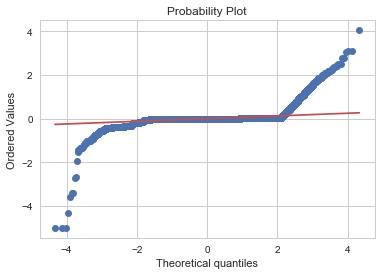

In [181]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',\
         'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'daytime', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,inf,tavg
1,inf,daytime
2,inf,sunrise
3,inf,sunset
4,inf,tmin
5,9.882983e+05,stnpressure
6,9.760985e+05,sealevel
7,4.266028e+05,tmax
8,7.755039e+03,windchill
9,1.813733e+03,dewpoint


tmax, sunrise, tavg, daytime, tmin, sunset, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [147]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1363.292690,wetbulb
1,811.293094,dewpoint
2,793.123748,windchill
3,334.122056,relative_humility
4,77.116032,avgspeed
5,54.196246,heat
6,46.038393,resultspeed
7,4.006905,item_nbr
8,2.220678,cool
9,1.671223,preciptotal


### VIF : wetbulb 버리고 다시 

In [153]:
cols = ['dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif

,VIF Factor,features
0,767.794032,dewpoint
1,53.219240,heat
2,2.217716,cool
3,1.254149,snowfall
4,1.671159,preciptotal
5,46.038116,resultspeed
6,73.252155,avgspeed
7,314.946575,relative_humility
8,205.441245,windchill
9,4.006236,item_nbr


### VIF : dewpoint 버리고 다시 

In [155]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,73.235635,avgspeed
1,45.111373,resultspeed
2,21.909675,relative_humility
3,20.602444,windchill
4,7.508258,heat
5,3.999423,item_nbr
6,1.669278,preciptotal
7,1.496232,cool
8,1.253292,snowfall


### VIF : avgspeed 버리고 다시 

In [164]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [165]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,21.881711,relative_humility
1,17.703570,windchill
2,6.123013,heat
3,4.920133,resultspeed
4,3.997525,item_nbr
5,1.557332,preciptotal
6,1.477038,cool
7,1.249224,snowfall


### VIF :  relative_humility 버리고 다시 

In [166]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,5.097696,windchill
1,4.913233,resultspeed
2,3.996967,item_nbr
3,3.108799,heat
4,1.411283,cool
5,1.315272,preciptotal
6,1.246227,snowfall


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [44]:
from patsy import dmatrix

In [45]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [46]:
len(df2_1_X), len(df2_1_target)

(92340, 92340)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [47]:
formula = 'C(month) + C(weekend) + C(rainY) + C(item_nbr) + 0'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.97923981, 0.97654914, 0.99219621, 0.98479742, 0.98647358,
       0.99140014, 0.98604967, 0.9893199 , 0.98915453, 0.99169358])

In [64]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.1063315 , 0.10441303, 0.10466608, 0.10523126, 0.10346473,
       0.10485719, 0.10261288, 0.10224357, 0.10314818, 0.10723965])

In [65]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([-0.01019522, -0.00943751, -0.01162688, -0.01045047, -0.01010085,
       -0.01015207, -0.01059074, -0.01184735, -0.01152317, -0.00857724])

In [67]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.01019522, -0.00943751, -0.01162688, -0.01045047, -0.01010085,
       -0.01015207, -0.01059074, -0.01184735, -0.01152317, -0.00857724])

### station 평균성능

In [68]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.0, 0.10442080707215833, -0.010450148815664907, -0.010450148815664907)